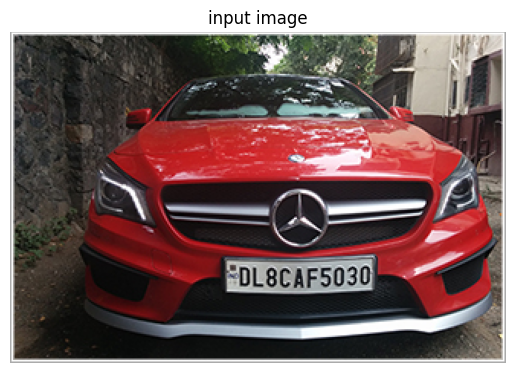

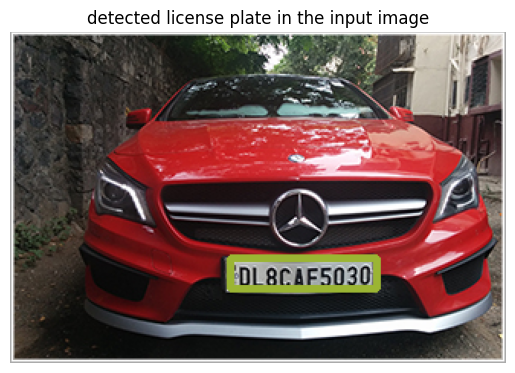

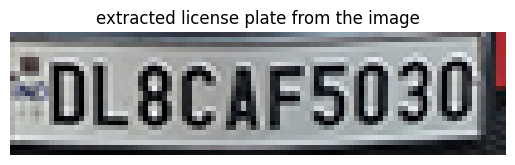

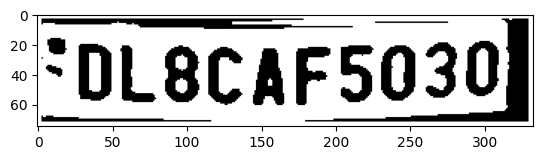

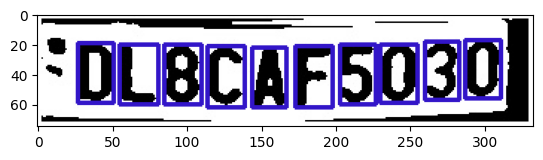

C:\Users\dmalu\PycharmProjects\PlateDetector_v2\.venv\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at ..\aten\src\ATen\native\Convolution.cpp:1032.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch 1, Loss: 2.099704779100986
Validation Loss: 0.47995912170484156, Accuracy: 0.8148148148148148, Precision: 0.8148148148148148, Recall: 0.8148148148148148, F1 Score: 0.8148148148148148
Epoch 2, Loss: 0.3875656998512082
Validation Loss: 0.2914160716794725, Accuracy: 0.9212962962962963, Precision: 0.9212962962962963, Recall: 0.9212962962962963, F1 Score: 0.9212962962962963
Epoch 3, Loss: 0.22126561436353354
Validation Loss: 0.19313768029741563, Accuracy: 0.9212962962962963, Precision: 0.9212962962962963, Recall: 0.9212962962962963, F1 Score: 0.9212962962962963
Epoch 4, Loss: 0.1511891543874697
Validation Loss: 0.15711594534279513, Accuracy: 0.9305555555555556, Precision: 0.9305555555555556, Recall: 0.9305555555555556, F1 Score: 0.9305555555555556
Epoch 5, Loss: 0.09776687462893895
Validation Loss: 0.05855116402977693, Accuracy: 0.9768518518518519, Precision: 0.9768518518518519, Recall: 0.9768518518518519, F1 Score: 0.9768518518518519
Epoch 6, Loss: 0.11805322950354266
Validation Loss

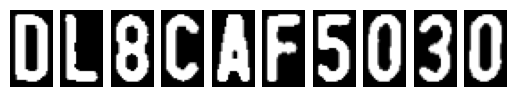

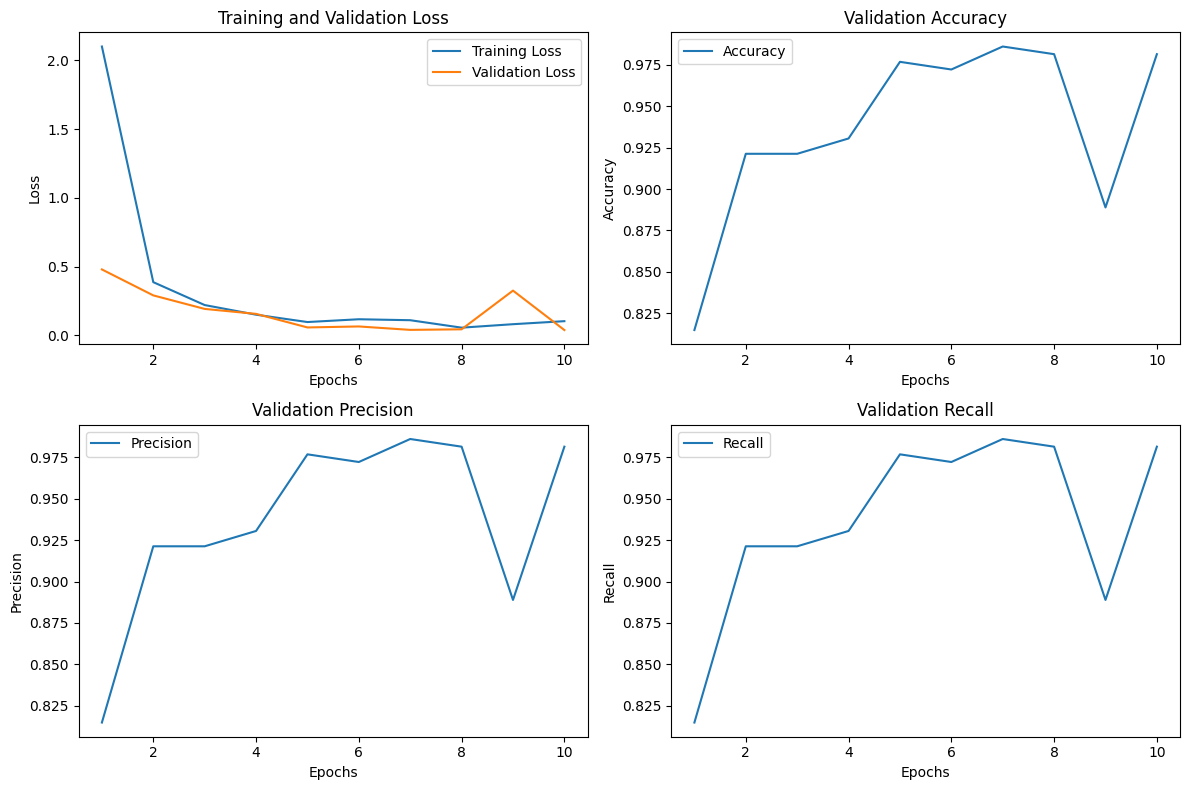

In [1]:
import cv2
import numpy as np
import torch
from PIL import Image
from torchvision import transforms

from main import LicensePlateModel, detect_plate, segment_characters

# Load the model and optimizer state
checkpoint = torch.load("license_plate_model.pt")
model = LicensePlateModel()
model.load_state_dict(checkpoint["model_state_dict"])
model.eval()

# Transform to apply to each character image
transform = transforms.Compose(
    [
        transforms.Resize((28, 28)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,)),
    ]
)

# Map class indices to characters
class_names = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ"


def detect_and_segment(image_path):
    img = cv2.imread(image_path)
    output_img, plate = detect_plate(img)
    char_images = segment_characters(plate)
    return char_images


def classify_characters(char_images, model):
    characters = []
    with torch.no_grad():
        for char_img in char_images:
            char_img = np.stack([char_img] * 3, axis=2)  # Convert to 3-channel image
            char_img = Image.fromarray(
                char_img.astype(np.uint8)
            )  # Convert to PIL Image
            char_img = transform(char_img).unsqueeze(
                0
            )  # Apply transforms and add batch dimension
            output = model(char_img)
            pred = torch.argmax(output, dim=1).item()
            characters.append(class_names[pred])
    return "".join(characters)


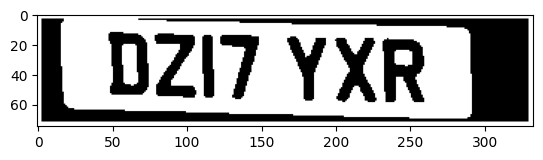

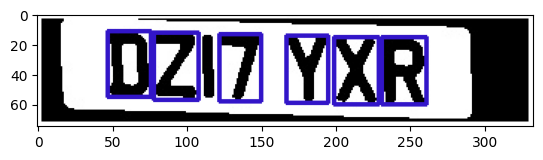

Recognized license plate: DZ7YXR


In [2]:
# Load and process the image
char_images = detect_and_segment("archive/images/Cars3.png")

# Classify the characters
license_plate = classify_characters(char_images, model)

print(f"Recognized license plate: {license_plate}")
